<a href="https://colab.research.google.com/github/SiracencoSerghei/DataScienceHW/blob/main/example_kaggle/les_2/les_2_1_kees.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import math
import numpy as np
import pandas as pandas
import matplotlib.pyplot as plt

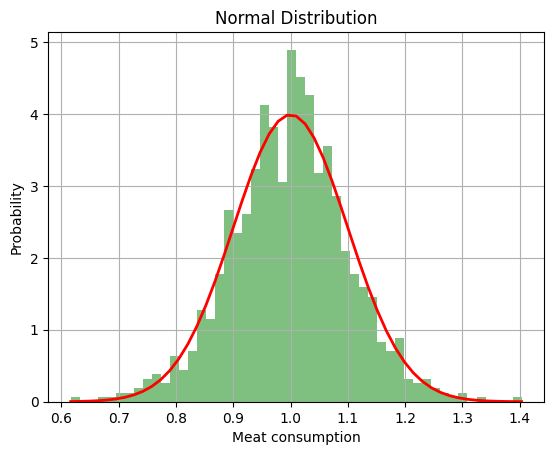

In [ ]:
# Random variable, normal distribution
# x = meat consumption from Silpo over the last 1000 days
# y = probability that x meat amount will be bought on a given day

mu, sigma = 1, 0.1  # mean and standard deviation
s = np.random.normal(mu, sigma, 1000)  # random variable

prob, bins, ignored = plt.hist(s, 50, density=True, alpha=0.5, color='g')  # histogram
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *
         np.exp(- (bins - mu)**2 / (2 * sigma**2)),  # normal distribution
         linewidth=2, color='r')  # plot normal distribution
plt.title('Normal Distribution')
plt.xlabel('Meat consumption')
plt.ylabel('Probability')
plt.grid()
plt.show()


In [ ]:
len(s)  # number of samples

1000

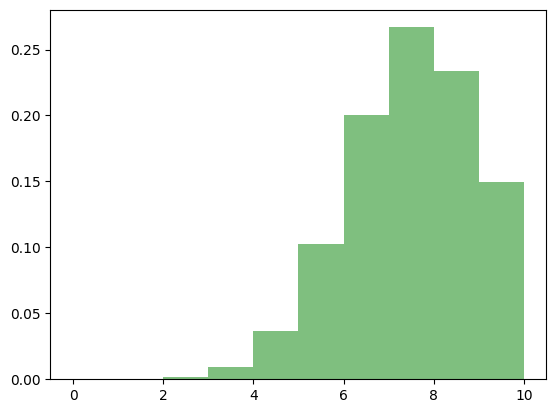

In [ ]:
# Random variable, binomial distribution
# x = number of times we throw heads in 10 coin flips
# y = probability to see x heads

n, p = 10, 0.7  # number of flips, probability of each result in a flip
s = np.random.binomial(n, p, 10_000_000)  # 1000 trials
prob, bins, ignored = plt.hist(s, n, density=True, alpha=0.5, color='g')  # histogram
plt.show()


In [ ]:
prob

array([5.400000e-06, 1.298000e-04, 1.457400e-03, 8.964200e-03,
       3.667880e-02, 1.028135e-01, 2.001597e-01, 2.668502e-01,
       2.336265e-01, 1.493145e-01])

In [ ]:
# expected value
expected_value = sum(i * prob[i] for i in range(n))
print(expected_value)

6.972472


In [ ]:
s.mean()  # mean of the samples

np.float64(7.0007598)

In [ ]:
np.median(s)  # median of the samples

np.float64(7.0)

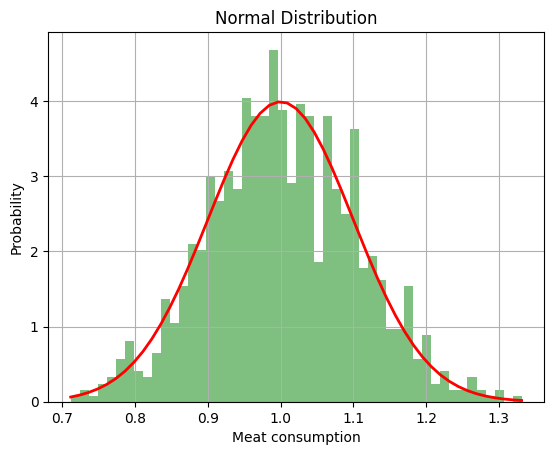

In [ ]:
# Random variable, normal distribution - in more detail

# x = meat consumption from Silpo over the last 1000 days
# y = probability that x meat amount will be bought on a given day

mu, sigma = 1, 0.1  # mean and standard deviation
x = np.random.normal(mu, sigma, 1000)  # random variable

prob, bins, ignored = plt.hist(x, 50, density=True, alpha=0.5, color='g')  # histogram
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *
         np.exp(- (bins - mu)**2 / (2 * sigma**2)),  # normal distribution
         linewidth=2, color='r')  # plot normal distribution
plt.title('Normal Distribution')
plt.xlabel('Meat consumption')
plt.ylabel('Probability')
plt.grid()
plt.show()

### Probability formula of normal distribution

$$
f(x) = \frac{1}{\sigma \sqrt{2\pi}} \, e^{ -\frac{1}{2} \left( \frac{x - \mu}{\sigma} \right)^2 }
$$

In [ ]:
from scipy.stats import norm

probability_pdf = norm.pdf(0.6, mu, sigma)  # probability density function
print(probability_pdf)

0.0013383022576488536


In [ ]:
# average (mean)
average = np.mean(x)
print(average)
print(type(average))
x.mean()  # mean of the samples

1.0036456228204504
<class 'numpy.float64'>


np.float64(1.0036456228204504)

In [ ]:
# variance дісперсія
# це міра розсіювання значень навколо середнього
variance = np.var(x)  # variance of the samples
print(variance)
np.sum(((x - average) ** 2)) / (len(x))  # variance of the samples, manual calculation

0.010524953276954348


np.float64(0.010524953276954348)

In [ ]:
# standard deviation
standard_deviation = np.std(x)  # standard deviation of the samples
print(standard_deviation)
standard_deviation_2 = np.sqrt(variance)  # standard deviation of the samples
print(standard_deviation_2)
np.sqrt(np.sum(((x - average) ** 2)) / (len(x)))  # standard deviation of the samples, manual calculation

0.10259119492897209
0.10259119492897209


np.float64(0.10259119492897209)

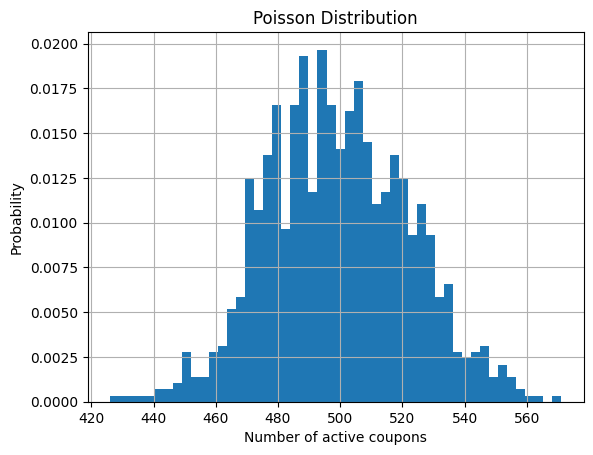

In [ ]:
# new variable: z = number of active coupons for discount on meat
# Poisson distribution is a discrete distribution that counts the frequency as integers, whose list (0, 1, 2, ...) is infinite
z = np.random.poisson(500, 1000)  # random variable 500 coupons, 1000 days
prob, bins, ignored = plt.hist(z, 50, density=True)  # histogram
plt.title('Poisson Distribution')
plt.xlabel('Number of active coupons')
plt.ylabel('Probability')
plt.grid()
plt.show()

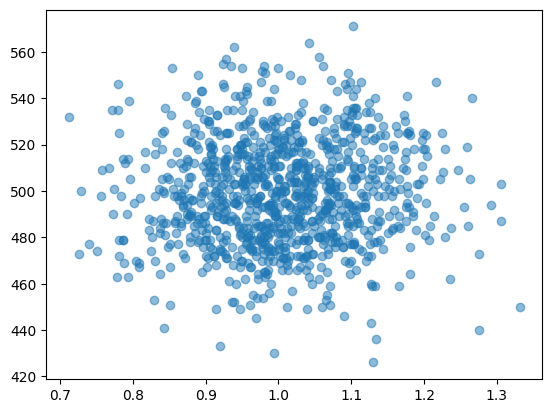

In [ ]:
plt.scatter(x, z, alpha=0.5)  # scatter plot

In [ ]:
np.cov(x, z)[0][1]  # covariance of x and z [0][1]
# Note that if element C0_1, which shows the covariance between x and z, is negative,
# which means that when the number of active coupons increases, the meat consumption decreases.

np.float64(0.07497480421457238)

In [ ]:
stndard_deviation_z = np.std(z)  # standard deviation of z
print(stndard_deviation_z)
# correlation coefficient
correlation_coefficient = np.corrcoef(x, z)[0][1]  # correlation coefficient of x and z
print(correlation_coefficient)
# Note that the correlation coefficient is a normalized covariance, which means that it is always between -1 and 1.
# If the correlation coefficient is close to 1, it means that x and z are positively correlated.
# If the correlation coefficient is close to -1, it means that x and z are negatively correlated.
# If the correlation coefficient is close to 0, it means that x and z are not correlated.
# Note that the correlation coefficient does not imply causation, it only shows the strength of the relationship between x and z.

22.828806363890337
0.03198066836900106


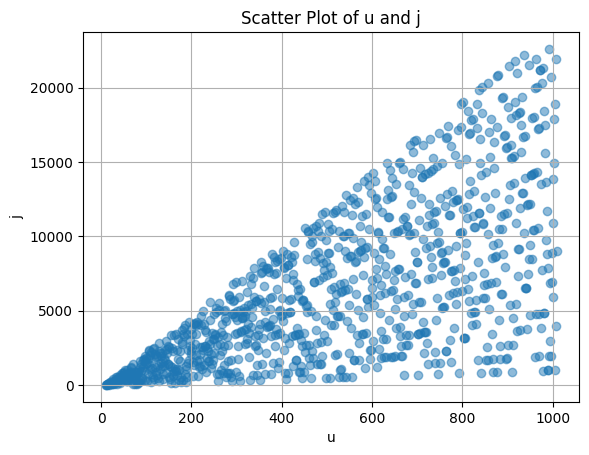

In [ ]:
u = np.arange(10, 1010)
j = np.arange(0, 1000)*np.random.randint(1, 25, size=(1000))
plt.scatter(u, j, alpha=0.5)  # scatter plot
plt.title('Scatter Plot of u and j')
plt.xlabel('u')
plt.ylabel('j')
plt.grid()
plt.show()

In [ ]:
np.cov(u, j)[0][1]  # covariance of u and j [0][1]

np.float64(1040517.1521521521)

In [ ]:
np.corrcoef(u, j)

array([[1.        , 0.67838328],
       [0.67838328, 1.        ]])

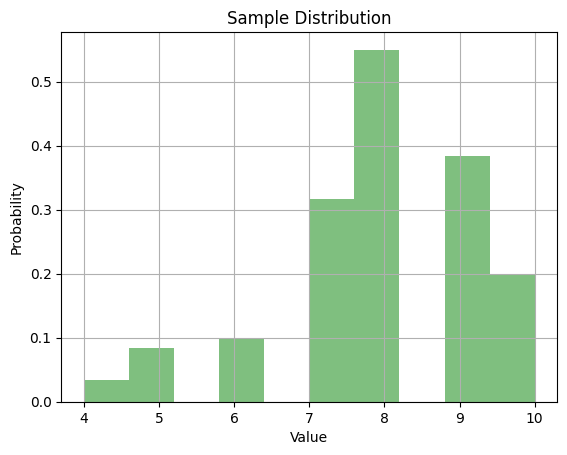

In [ ]:
# Central Limit Theorem
# The Central Limit Theorem states that the distribution of the sum (or average) of a large number of independent,
# identically distributed variables approaches a normal distribution, regardless of the original distribution of the variables.
# Центральна гранична теорема
# це теорема, яка стверджує, що розподіл суми (або середнього) великої кількості незалежних, ідентично розподілених змінних наближається
# до нормального розподілу, незалежно від початкового розподілу змінних.

N = 10_00_000  # number of samples
n = 100  # number of samples in each sample
s = np.random.binomial(10, 0.8, N)
s = s.reshape((N // n, n))  # reshape to (N/n, n)

prob, bins, ignored = plt.hist(s[0], 10, density=True, alpha=0.5, color='g')  # histogram of the first sample
plt.title('Sample Distribution')
plt.xlabel('Value')
plt.ylabel('Probability')
plt.grid()
plt.show()

In [ ]:
len(s)  # number of samples in each sample

10000

In [ ]:
s_means = s.mean(axis=1)  # means of each sample
# s_means

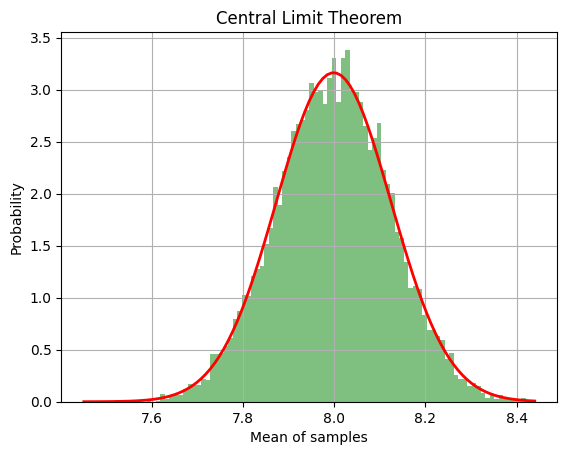

In [ ]:
sigma = s_means.std()  # standard deviation of the means
mu = s_means.mean()  # mean of the means

prob, bins, ignored = plt.hist(s_means, 100, density=True, alpha=0.5, color='g')  # histogram of the means
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *
         np.exp(- (bins - mu)**2 / (2 * sigma**2)),  # normal distribution
         linewidth=2, color='r')  # plot normal distribution
plt.title('Central Limit Theorem')
plt.xlabel('Mean of samples')
plt.ylabel('Probability')
plt.grid()
plt.show()

# Pandas

### Intro

In [ ]:
import pandas as pd

mountain_height = pd.Series([2061, 2035.8, 2028.5, 2022.5, 2016.4])

print(mountain_height)

0    2061.0
1    2035.8
2    2028.5
3    2022.5
4    2016.4
dtype: float64


In [ ]:
mountain_heights = pd.Series([2061, 2035.8, 2028.5, 2022.5, 2016.4],
                             index=['Hoverla', 'Pip Ivan', 'Petros', 'Gorgany', 'Chornohora'],
                             name='Mountain Heights in Ukraine (m)',
                             dtype='float64')
print(mountain_heights)
print('*****************************')
print(mountain_heights['Hoverla'])  # access by index
print('*****************************')
print(mountain_heights[['Hoverla', 'Pip Ivan']])  # access by multiple indices
print("*****************************")
print(mountain_heights[0])  # access by position
print("*****************************")
print(mountain_heights[1:3])  # access by range
print("*****************************")
print(mountain_heights[mountain_heights > 2020])  # access by condition

Hoverla       2061.0
Pip Ivan      2035.8
Petros        2028.5
Gorgany       2022.5
Chornohora    2016.4
Name: Mountain Heights in Ukraine (m), dtype: float64
*****************************
2061.0
*****************************
Hoverla     2061.0
Pip Ivan    2035.8
Name: Mountain Heights in Ukraine (m), dtype: float64
*****************************
2061.0
*****************************
Pip Ivan    2035.8
Petros      2028.5
Name: Mountain Heights in Ukraine (m), dtype: float64
*****************************
Hoverla     2061.0
Pip Ivan    2035.8
Petros      2028.5
Gorgany     2022.5
Name: Mountain Heights in Ukraine (m), dtype: float64


/tmp/ipykernel_41776/2136169125.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(mountain_heights[0])  # access by position


In [ ]:
print(mountain_heights.describe())  # descriptive statistics of the series

count       5.000000
mean     2032.840000
std        17.304421
min      2016.400000
25%      2022.500000
50%      2028.500000
75%      2035.800000
max      2061.000000
Name: Mountain Heights in Ukraine (m), dtype: float64
